In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from pycocotools.coco import COCO
from torch.utils.data import Dataset
import skimage.io as io

In [3]:
COCO_CLASSES = ('__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic_light', 'fire_hydrant',
               'stop_sign', 'parking_meter', 'bench', 'bird', 'cat', 'dog',
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
               'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
               'skis', 'snowboard', 'sports_ball', 'kite', 'baseball_bat',
               'baseball_glove', 'skateboard', 'surfboard', 'tennis_racket',
               'bottle', 'wine_glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
               'hot_dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
               'potted_plant', 'bed', 'dining_table', 'toilet', 'tv', 'laptop',
               'mouse', 'remote', 'keyboard', 'cell_phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
               'vase', 'scissors', 'teddy_bear', 'hair_drier', 'toothbrush')

In [31]:
class myCOCO(Dataset):
  CLASSES = COCO_CLASSES
  def __init__(self,annotations_file, transform=None, target_transform=None):
    self.annotations_file = annotations_file
    self.coco = COCO(annotations_file)
    self.transforms = transform
    self.target_transform = target_transform
    self.ids = list(self.coco.imgs.keys())

  def __len__(self):
      return len(self.ids)

  def __getitem__(self, index):
    print(index)
    img_id = self.ids[index]
    ann_ids = self.coco.getAnnIds(imgIds=img_id)
    # infor
    coco_annotation = self.coco.loadAnns(ann_ids)
    img = self.coco.loadImgs(img_id)[0]
    img = io.imread(img['coco_url'])
    return img 


In [32]:
from torch.utils.data import DataLoader
annFile = "/content/drive/MyDrive/SOLO-implementation/instances_train2017.json"
dataset = myCOCO(annFile, None)


loading annotations into memory...


KeyboardInterrupt: ignored

In [33]:
dataloader = DataLoader(dataset, batch_size=5, shuffle=False, num_workers=0)
dataloader

In [34]:
for batch in enumerate(dataloader):
    images, targets = batch
    break

0
1
2
3
4


RuntimeError: ignored

In [ ]:
for batch in next(iter(dataloader)):
    images, targets = batch
    break

In [9]:
dataloader

In [29]:
coco=COCO("/content/drive/MyDrive/SOLO-implementation/instances_train2017.json")
coco

loading annotations into memory...
Done (t=19.51s)
creating index...
index created!


In [37]:
ids = list(coco.imgs.keys())

In [39]:
index = 1
img_id = ids[index]
        # List: get annotation id from coco
ann_ids = coco.getAnnIds(imgIds=img_id)
        # Dictionary: target coco_annotation file for an image
coco_annotation = coco.loadAnns(ann_ids)
        # path for input image
img = coco.loadImgs(img_id)[0]
img

{'license': 4,
 'file_name': '000000522418.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000522418.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-14 11:38:44',
 'flickr_url': 'http://farm1.staticflickr.com/1/127244861_ab0c0381e7_z.jpg',
 'id': 522418}

In [53]:
len(coco_annotation)

4

In [41]:

%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

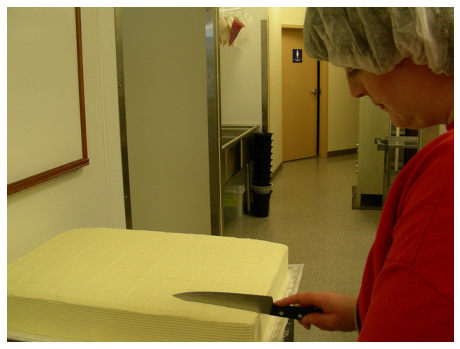

In [42]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

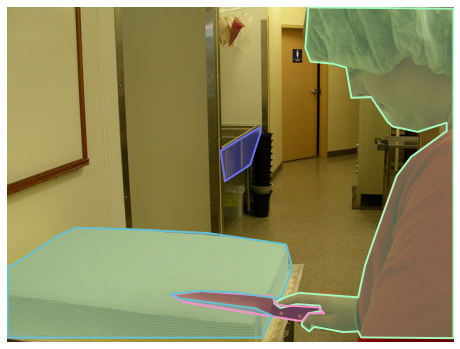

In [49]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'],  iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)